In [1]:
#https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c
#The idea is straightforward, replace numbers with colors.
#Now, this visualization style came a long way from simple color-coded 
#tables, it became widely used with geospatial data, 
#and its commonly applied for describing density or intensity of variables,
#visualize patterns, variance, and even anomalies.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
# read file
df = pd.read_csv('Foreign_Exchange_Rates.csv')
#print(df)
df = pd.read_csv('Foreign_Exchange_Rates.csv', 
                 usecols=[1,7], names=['DATE', 'CAD_USD'], 
                 skiprows=1, index_col=0, parse_dates=[0])
df

,CAD_USD
DATE,
2000-01-03,1.4465
2000-01-04,1.4518
2000-01-05,1.4518
2000-01-06,1.4571
2000-01-07,1.4505
...,...
2019-12-25,ND
2019-12-26,1.3124
2019-12-27,1.3073


In [3]:
df['CAD_USD'] = pd.to_numeric(df.CAD_USD, errors='coerce')
df.dropna(inplace=True)
print(df)

            CAD_USD
DATE               
2000-01-03   1.4465
2000-01-04   1.4518
2000-01-05   1.4518
2000-01-06   1.4571
2000-01-07   1.4505
...             ...
2019-12-24   1.3160
2019-12-26   1.3124
2019-12-27   1.3073
2019-12-30   1.3058
2019-12-31   1.2962

[5019 rows x 1 columns]


In [4]:
# create a copy of the dataframe, and add columns for month and year
df_m = df.copy()
df_m['month'] = [i.month for i in df_m.index]
df_m['year'] = [i.year for i in df_m.index]
# group by month and year, get the average
df_m = df_m.groupby(['month', 'year']).mean()
print(df_m)

             CAD_USD
month year          
1     2000  1.448600
      2001  1.503200
      2002  1.599714
      2003  1.541448
      2004  1.295755
...              ...
12    2015  1.371255
      2016  1.333919
      2017  1.276870
      2018  1.343611
      2019  1.316895

[240 rows x 1 columns]


In [5]:
df_m = df_m.unstack(level=0)
print(df_m)

        CAD_USD                                                              \
month        1         2         3         4         5         6         7    
year                                                                          
2000   1.448600  1.451210  1.460774  1.468875  1.495736  1.477045  1.477785   
2001   1.503200  1.521563  1.558741  1.557767  1.541050  1.524538  1.530790   
2002   1.599714  1.596400  1.587743  1.581486  1.550155  1.531840  1.545550   
2003   1.541448  1.512147  1.476081  1.458205  1.383957  1.352510  1.382091   
2004   1.295755  1.329895  1.328578  1.341973  1.378860  1.357841  1.322505   
2005   1.224835  1.240053  1.216026  1.235900  1.255529  1.240168  1.222855   
2006   1.157165  1.148895  1.157309  1.144105  1.109991  1.113727  1.129445   
2007   1.176262  1.170989  1.168159  1.134986  1.095086  1.065105  1.050186   
2008   1.009943  0.998555  1.002943  1.013718  0.999305  1.016624  1.012964   
2009   1.224820  1.245200  1.264518  1.224182  1.152

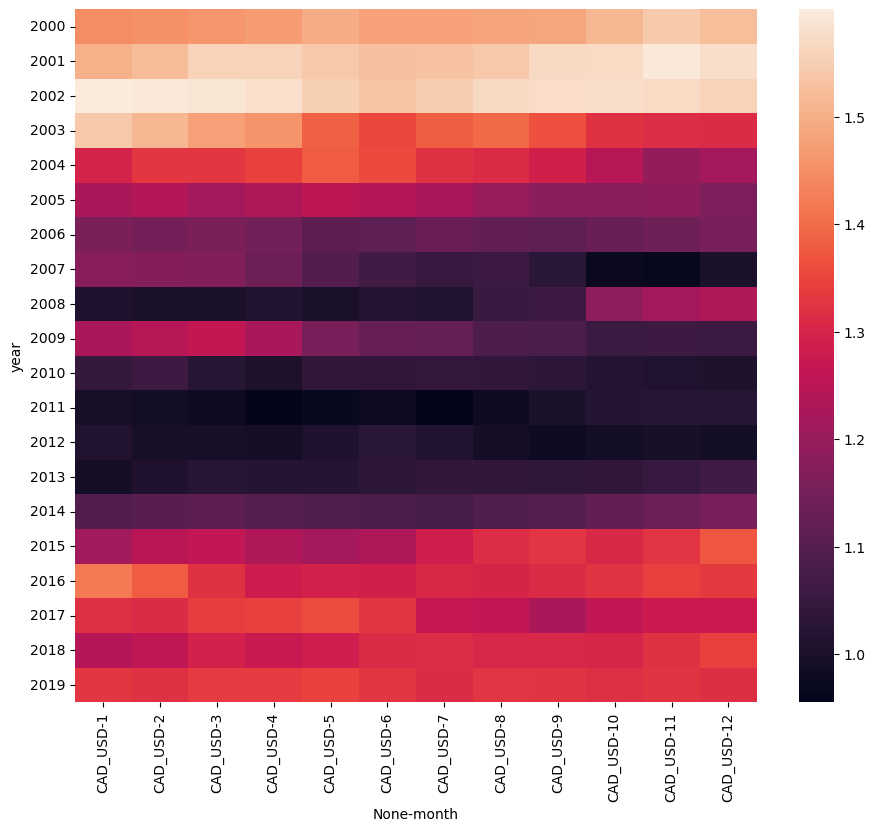

In [6]:
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(df_m)
plt.show()

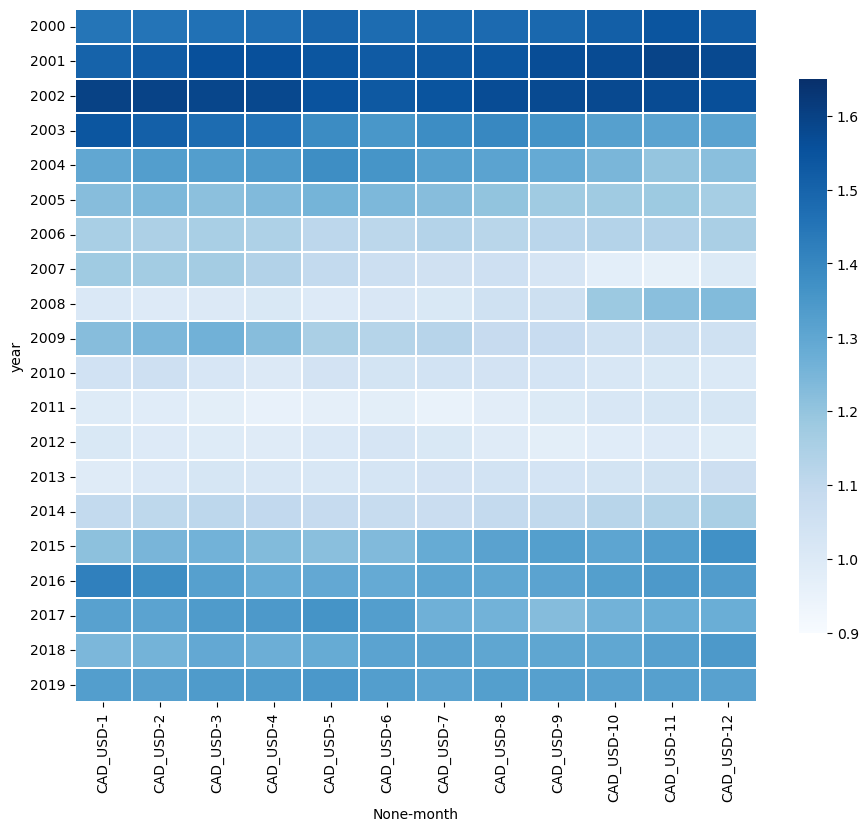

In [7]:
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sb.heatmap(df_m, cmap="Blues", vmin= 0.9, vmax=1.65,
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

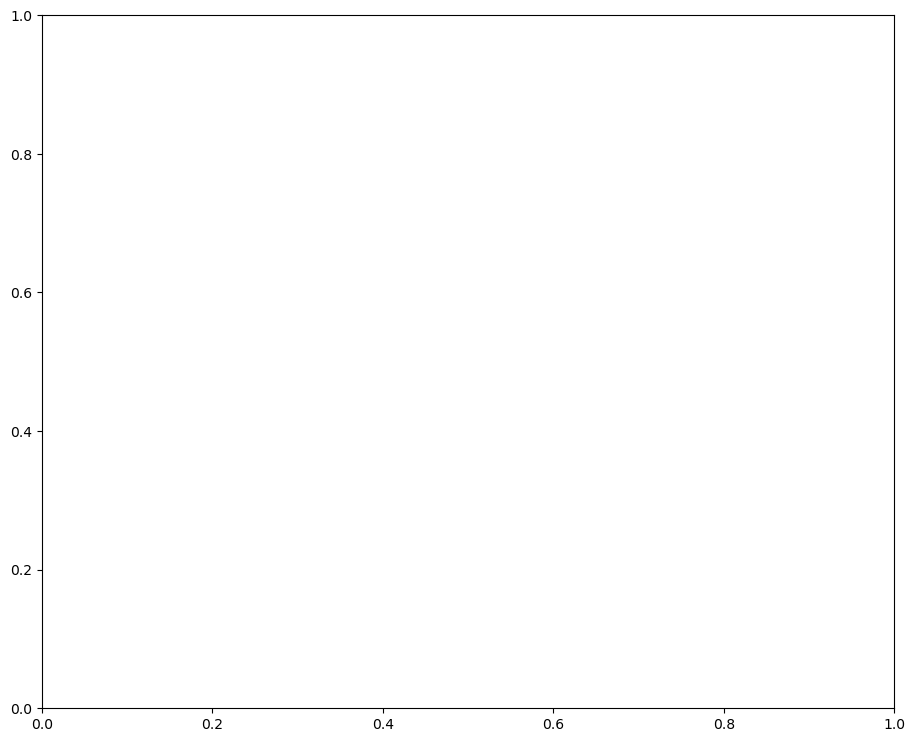

In [19]:
# figure
fig, ax = plt.subplots(figsize=(11, 9))
plt.show()

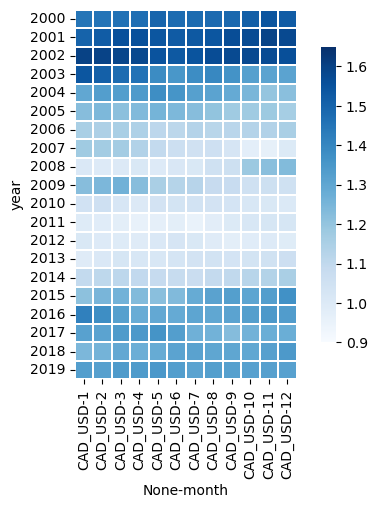

In [8]:
# plot heatmap
sb.heatmap(df_m, cmap="Blues", vmin= 0.9, vmax=1.65, square=True,
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

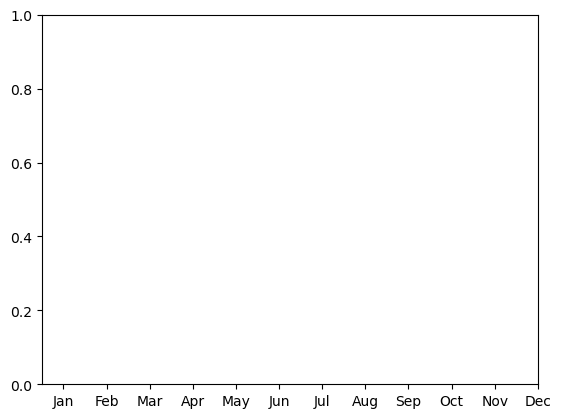

In [9]:
ax.xaxis.tick_top()
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y = np.arange(0.5, 12)
plt.xticks(y, labels)    #optional to set the class names for the bars

plt.show()

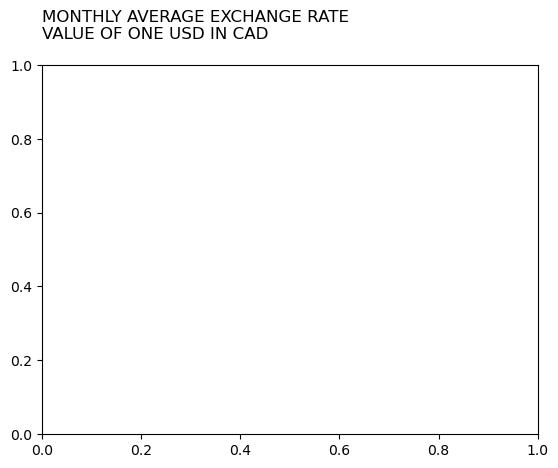

In [10]:
# axis labels
plt.xlabel('')
plt.ylabel('')
# title
title = 'monthly Average exchange rate\nValue of one USD in CAD\n'.upper()
plt.title(title, loc='left')
plt.show()

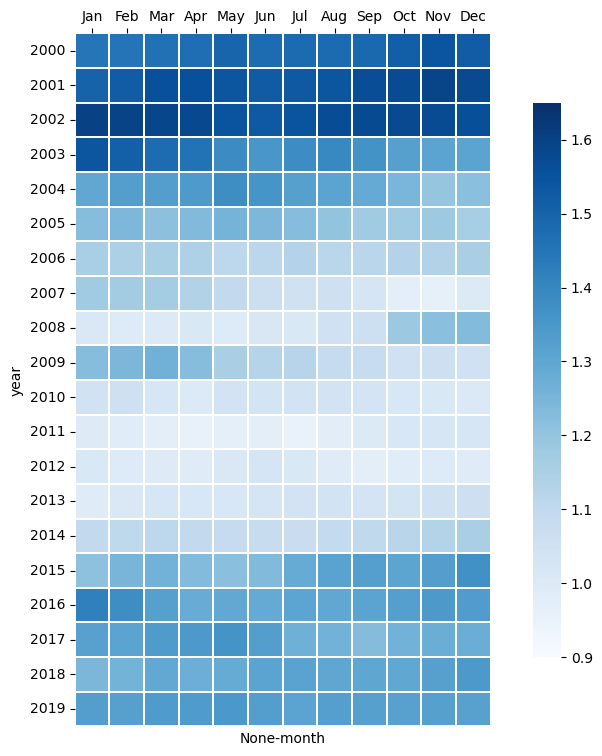

Text(0.0, 1.0, 'MONTHLY AVERAGE EXCHANGE RATE\nVALUE OF ONE USD IN CAD\n')

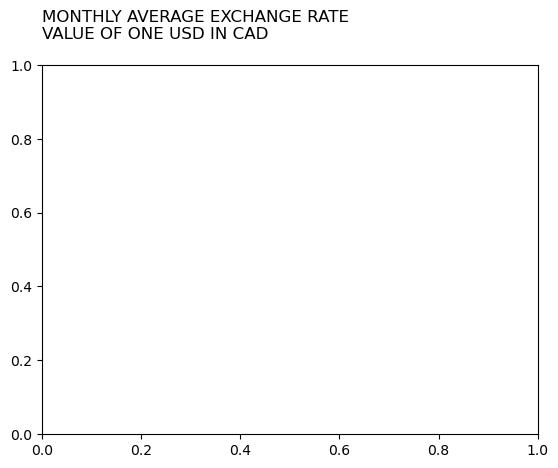

In [11]:
# figure
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sb.heatmap(df_m, cmap="Blues", vmin= 0.9, vmax=1.65, square=True,
           linewidth=0.3, cbar_kws={"shrink": .8})
# xticks
ax.xaxis.tick_top()
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y = np.arange(0.5, 12)
plt.xticks(y, labels)    #optional to set the class names for the bars

plt.show()
# axis labels
plt.xlabel('')
plt.ylabel('')
# title
title = 'monthly Average exchange rate\nValue of one USD in CAD\n'.upper()
plt.title(title, loc='left')